# Spotify Playlist - Clustering

In this notebook, a dataset that has been preprocessed will be used, and two different ML clustering algorithms will be applied on the dataset in order to evaluate them and see which one is better in this scenario. 

The first step is importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
import statistics

The following part defines the necessary functions and demonstrates how each of them operates on a sample playlist

In [2]:
#Read json data and convert to DataFrame
def get_dataset():
    playlists_set = pd.read_json('playlists-challenge.json')
    return playlists_set
playlists_set = get_dataset()
playlists_set

,size,playlists
0,200,"{'name': {'0': 'Ultralight Beam', '1': 'Father..."
1,200,"{'name': {'0': 'Little Talks', '1': 'Quesadill..."
2,200,"{'name': {'0': 'Free Ride', '1': 'Spill the Wi..."
3,200,"{'name': {'0': 'Feels Like Home - Radio Edit',..."
4,200,{'name': {'0': 'Work from Home (feat. Ty Dolla...
...,...,...
195,200,"{'name': {'0': 'Stop Trippin'', '1': 'Red Lips..."
196,200,"{'name': {'0': 'through the late night', '1': ..."
197,200,"{'name': {'0': 'The Way', '1': 'Mirrors', '2':..."
198,200,"{'name': {'0': 'No Sleep - Intro', '1': 'Back ..."


In [3]:
#Extract a sample playlist
def get_playlist_from_dataset(playlists_set, index):
    playlists = playlists_set.playlists
    playlist = pd.DataFrame(playlists[index])
    return playlist
playlist = get_playlist_from_dataset(playlists_set, 10)
playlist

,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness
0,You're so Vain,No Secrets,Carly Simon,2DnJjbjNTV9Nd5NOa1KGba,1972,74,0.659,0.678,0.647,-8.180
1,Hotel California - 2013 Remaster,Hotel California (2013 Remaster),Eagles,40riOy7x9W7GXjyGp4pjAv,1976-12-08,84,0.579,0.508,0.609,-9.484
2,Miss You - Remastered,Some Girls,The Rolling Stones,3hJLKtTpgct9Y9wKww0BiR,1978-06-09,69,0.795,0.710,0.845,-4.746
3,"December, 1963 (Oh What a Night!)",Who Loves You,Frankie Valli & The Four Seasons,1hQFF33xi8ruavZNyovtUN,1975,73,0.737,0.495,0.967,-13.489
4,Lean on Me,Still Bill,Bill Withers,3M8FzayQWtkvOhqMn2V4T2,1972-05-01,70,0.619,0.220,0.426,-13.843
...,...,...,...,...,...,...,...,...,...,...
95,Dude (Looks Like A Lady),Permanent Vacation,Aerosmith,6gQUbFwwdYXlKdmqRoWKJe,1987-01-01,71,0.540,0.982,0.910,-2.962
96,Proud Mary,Bayou Country (Expanded Edition),Creedence Clearwater Revival,6pxWv6GV35VGmcPf5dh6CH,1969-01-05,71,0.699,0.641,0.728,-7.564
97,Learning To Fly,Into The Great Wide Open,Tom Petty and the Heartbreakers,17S4XrLvF5jlGvGCJHgF51,1991-01-01,72,0.651,0.766,0.949,-9.935
98,Some Kind Of Wonderful - Remastered 1999,30 Years Of Funk: 1969-1999 The Anthology,Grand Funk Railroad,1cU34sZG9kF4FYHCoAD0Ib,1999-01-01,71,0.855,0.691,0.647,-6.510


In [4]:
#Scale the features
def scale_features(df):
    col_features = df.columns[6:]
    X = StandardScaler().fit_transform(df[col_features])
    return X
X = scale_features(playlist)
X

array([[ 0.70715904, -0.03571076, -0.05515641,  0.25884699],
       [ 0.12704498, -0.95275443, -0.23277876, -0.15000565],
       [ 1.69335295,  0.13690923,  0.87034949,  1.33553411],
       [ 1.27277025, -1.0228813 ,  1.44061071, -1.40572257],
       [ 0.41710201, -2.50633429, -1.08817058, -1.51671478],
       [ 1.30902738,  0.55767044, -0.67683462, -0.56356136],
       [-0.13400635, -0.83947256,  0.40759654, -0.22305985],
       [-0.13400635,  1.00000915,  0.44499072,  0.78120015],
       [ 0.87394184, -0.79631757,  1.42191362, -0.39142938],
       [ 0.28657635, -0.82328944, -1.48548372, -0.03556454],
       [ 0.95370752,  1.2211785 ,  1.51072479,  1.66631597],
       [ 1.30177596,  0.06678236,  0.53847616,  0.62004197],
       [ 0.15605068,  1.41537599,  0.67403006,  1.21827116],
       [ 0.25757064, -0.4295001 ,  1.06199465, -0.9429415 ],
       [ 0.64189621, -0.14359825,  1.04797184, -0.59648278],
       [ 0.26482207, -0.06268263, -0.32158993, -0.44692548],
       [-0.23552631, -3.

5

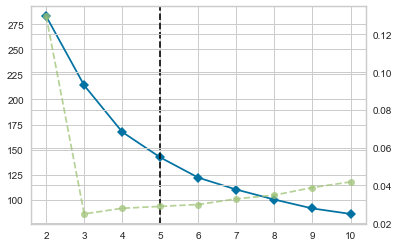

In [5]:
#Use the elbow model to get ideal number of clusters, relying on distortion metric
def elbow_model(X):
    model = KElbowVisualizer(KMeans(), k=10)
    model.fit(X)
    clusters = model.elbow_value_
    return clusters
clusters = elbow_model(X)
clusters

In [7]:
#Apply kmeans clustering
def perform_clustering_kmeans(X, clusters, df):
    kmeans = KMeans(init="k-means++", n_clusters=clusters).fit(X)
    result = df.copy(deep=True)
    result['kmeans'] = kmeans.labels_
    score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    return result, score
result, score = perform_clustering_kmeans(X, clusters, playlist)
print(score)
result

0.26263530838600735


,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness,kmeans
0,You're so Vain,No Secrets,Carly Simon,2DnJjbjNTV9Nd5NOa1KGba,1972,74,0.659,0.678,0.647,-8.180,4
1,Hotel California - 2013 Remaster,Hotel California (2013 Remaster),Eagles,40riOy7x9W7GXjyGp4pjAv,1976-12-08,84,0.579,0.508,0.609,-9.484,4
2,Miss You - Remastered,Some Girls,The Rolling Stones,3hJLKtTpgct9Y9wKww0BiR,1978-06-09,69,0.795,0.710,0.845,-4.746,4
3,"December, 1963 (Oh What a Night!)",Who Loves You,Frankie Valli & The Four Seasons,1hQFF33xi8ruavZNyovtUN,1975,73,0.737,0.495,0.967,-13.489,1
4,Lean on Me,Still Bill,Bill Withers,3M8FzayQWtkvOhqMn2V4T2,1972-05-01,70,0.619,0.220,0.426,-13.843,2
...,...,...,...,...,...,...,...,...,...,...,...
95,Dude (Looks Like A Lady),Permanent Vacation,Aerosmith,6gQUbFwwdYXlKdmqRoWKJe,1987-01-01,71,0.540,0.982,0.910,-2.962,0
96,Proud Mary,Bayou Country (Expanded Edition),Creedence Clearwater Revival,6pxWv6GV35VGmcPf5dh6CH,1969-01-05,71,0.699,0.641,0.728,-7.564,4
97,Learning To Fly,Into The Great Wide Open,Tom Petty and the Heartbreakers,17S4XrLvF5jlGvGCJHgF51,1991-01-01,72,0.651,0.766,0.949,-9.935,1
98,Some Kind Of Wonderful - Remastered 1999,30 Years Of Funk: 1969-1999 The Anthology,Grand Funk Railroad,1cU34sZG9kF4FYHCoAD0Ib,1999-01-01,71,0.855,0.691,0.647,-6.510,4


In [8]:
#Apply dbscan clustering
def perform_clustering_dbscan(X, df):
    dbscan = DBSCAN(eps=1.2, min_samples=10, metric='euclidean', algorithm='ball_tree').fit(X)
    result = df.copy(deep=True)
    result['dbscan'] = dbscan.labels_
    score = silhouette_score(X, dbscan.labels_, metric='euclidean')
    return result, score
result,score = perform_clustering_dbscan(X, result)
print(score)
result

0.25920828866050294


,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness,kmeans,dbscan
0,You're so Vain,No Secrets,Carly Simon,2DnJjbjNTV9Nd5NOa1KGba,1972,74,0.659,0.678,0.647,-8.180,4,0
1,Hotel California - 2013 Remaster,Hotel California (2013 Remaster),Eagles,40riOy7x9W7GXjyGp4pjAv,1976-12-08,84,0.579,0.508,0.609,-9.484,4,0
2,Miss You - Remastered,Some Girls,The Rolling Stones,3hJLKtTpgct9Y9wKww0BiR,1978-06-09,69,0.795,0.710,0.845,-4.746,4,0
3,"December, 1963 (Oh What a Night!)",Who Loves You,Frankie Valli & The Four Seasons,1hQFF33xi8ruavZNyovtUN,1975,73,0.737,0.495,0.967,-13.489,1,0
4,Lean on Me,Still Bill,Bill Withers,3M8FzayQWtkvOhqMn2V4T2,1972-05-01,70,0.619,0.220,0.426,-13.843,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Dude (Looks Like A Lady),Permanent Vacation,Aerosmith,6gQUbFwwdYXlKdmqRoWKJe,1987-01-01,71,0.540,0.982,0.910,-2.962,0,0
96,Proud Mary,Bayou Country (Expanded Edition),Creedence Clearwater Revival,6pxWv6GV35VGmcPf5dh6CH,1969-01-05,71,0.699,0.641,0.728,-7.564,4,0
97,Learning To Fly,Into The Great Wide Open,Tom Petty and the Heartbreakers,17S4XrLvF5jlGvGCJHgF51,1991-01-01,72,0.651,0.766,0.949,-9.935,1,0
98,Some Kind Of Wonderful - Remastered 1999,30 Years Of Funk: 1969-1999 The Anthology,Grand Funk Railroad,1cU34sZG9kF4FYHCoAD0Ib,1999-01-01,71,0.855,0.691,0.647,-6.510,4,0


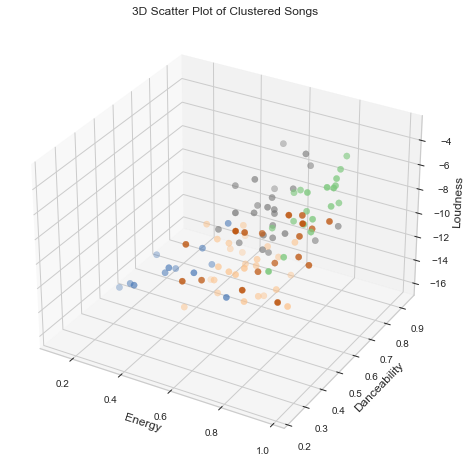

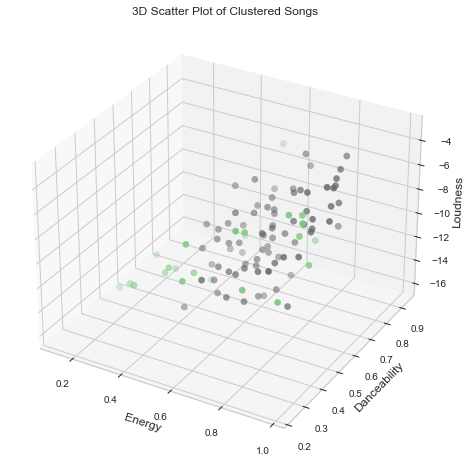

In [9]:
#Create a 3D scatter plot of clustered songs
def visualize(labels):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(projection='3d')

    x = result['energy']
    y = result['danceability']
    z = result['loudness']

    ax.scatter(x,y,z,c=labels,s=40,cmap='Accent')
    ax.set_xlabel('Energy',fontsize=12)
    ax.set_ylabel('Danceability',fontsize=12)
    ax.set_zlabel('Loudness',fontsize=12)
    ax.set_title("3D Scatter Plot of Clustered Songs")
visualize(result['kmeans'])
visualize(result['dbscan'])

Now that we have demonstrated (on a sample playlist) how data is retrieved, processed and applied to algorithms, we are going to apply both algorithms on the entire dataset and compare their evaluation metrics, in order to choose the better one

([0.2582277208449423,
  0.22925085326930797,
  0.25127857732012504,
  0.26094607501130396,
  0.285910319885682,
  0.2568785338613906,
  0.3164558943586637,
  0.2624680460409195,
  0.2970440795688254,
  0.2948934701903796,
  0.2746616321494588,
  0.2690550882384024,
  0.2447433516491148,
  0.2636672630777452,
  0.23471703109892134,
  0.24038669286542358,
  0.21305298964552472,
  0.26200630479163584,
  0.25101355284094856,
  0.2919761175237167,
  0.2804123919233763,
  0.2384889595376146,
  0.27777283065553815,
  0.25954202494281875,
  0.3281349362957275,
  0.2491798197779377,
  0.24468501338879264,
  0.2974524262917769,
  0.24890154875215342,
  0.23490385079517104,
  0.2610866377038629,
  0.2578081900864073,
  0.294276166510119,
  0.2519409446297471,
  0.27442828805614267,
  0.2591547767778589,
  0.2613208293760122,
  0.25660479160724553,
  0.2512348333191799,
  0.29952219635167365,
  0.3024032508408964,
  0.2642467500230554,
  0.2556839891935735,
  0.24376216851442536,
  0.2233479984006

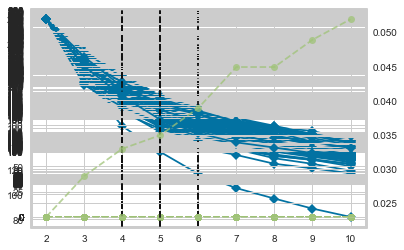

In [11]:
#Perform kmeans algorithm on the entire set and get average silhouette score
scores_kmeans = []
for i in range(0, len(playlists_set)):
    playlist = get_playlist_from_dataset(playlists_set, i)
    X = scale_features(playlist)
    clusters = elbow_model(X)
    result, score = perform_clustering_kmeans(X, clusters, playlist)
    scores_kmeans.append(score)
scores_kmeans, statistics.mean(scores_kmeans)

In [10]:
#Perform dbscan algorithm on the entire set and get average silhouette score
scores_dbscan = []
for i in range(0, len(playlists_set)):
    playlist = get_playlist_from_dataset(playlists_set, i)
    X = scale_features(playlist)
    result, score = perform_clustering_dbscan(X, playlist)
    scores_dbscan.append(score)
scores_dbscan, statistics.mean(scores_dbscan)

([0.26368093060803893,
  0.27313411661925874,
  0.19497664010144214,
  0.3105195500940069,
  0.293710906690275,
  0.26390759198463004,
  0.20416857822502202,
  0.2075728283741276,
  0.1784116263023164,
  0.307480712533606,
  0.25920828866050294,
  0.17197400154375103,
  0.1140934190621137,
  0.14648114325696293,
  0.35620944837269014,
  0.1862253945743406,
  0.1955842354698974,
  0.3179869230886759,
  0.15022622181166348,
  0.3703303524990988,
  0.2452996248675853,
  0.33347014978526934,
  0.22072985615044063,
  0.2798886644278109,
  0.43547316836730127,
  0.2363165827937055,
  0.17436126189299908,
  0.30062528202371497,
  0.15884593232824626,
  0.21990870139252705,
  0.20123483502701675,
  0.1818958879090724,
  0.2136139478025649,
  0.1760003424584653,
  0.1770020126653497,
  0.30432789325839,
  0.23358348323362527,
  0.3457092496663122,
  0.17879615478844357,
  0.13677762386499098,
  0.30928789765326625,
  0.25387532214437913,
  0.26327624275944767,
  0.23377341102441465,
  0.3297252

In [12]:
# Compare scores and choose better algorithm
algorithm = 'dbscan' if (statistics.mean(scores_dbscan) > statistics.mean(scores_kmeans)) else 'kmeans'
print('The better algorithm is: ' + algorithm)

The better algorithm is: kmeans
